Cleaned dataset saved to cleaned_kaggle_survey_2021.csv


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


Insights dashboard saved to kaggle_survey_2021_insights_dashboard.png


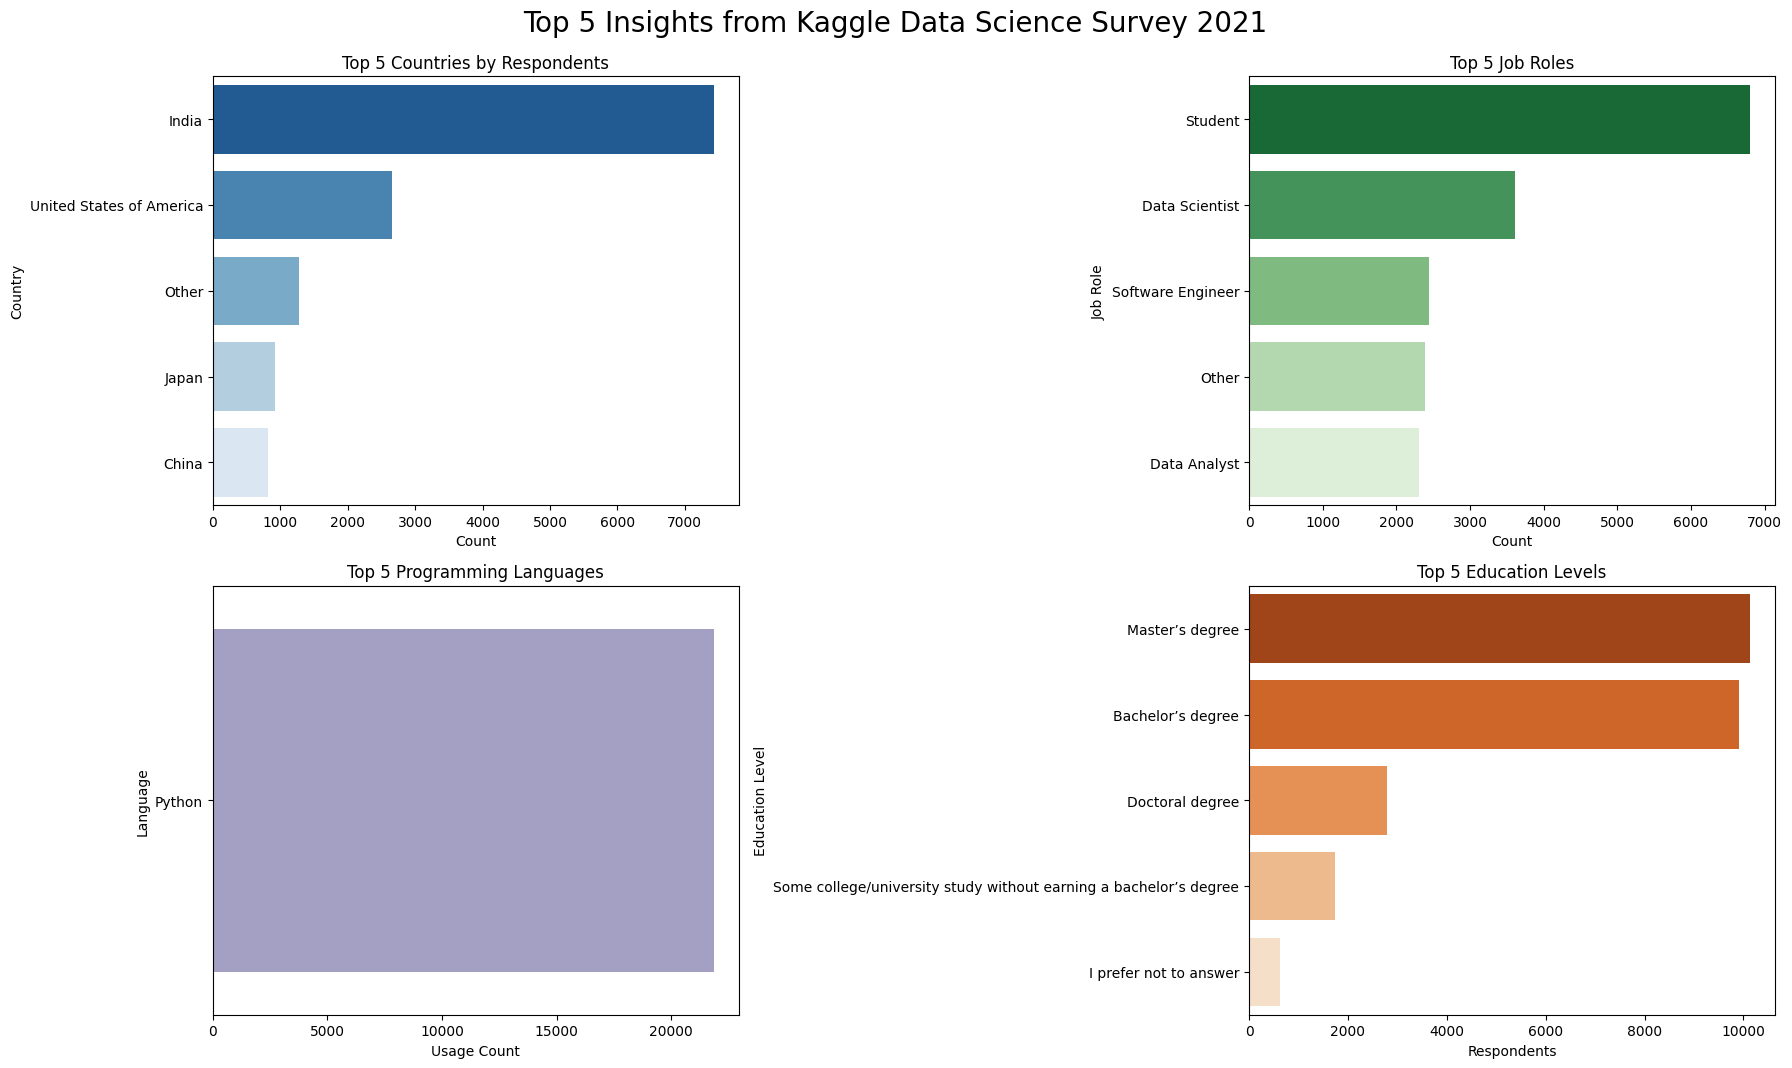

In [17]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

file_path = '/kaggle/input/kaggle-survey/kaggle_survey_2021_responses.csv'

# Load dataset 
df_raw = pd.read_csv(file_path, low_memory=False)

# Remove first row if it's duplicated header
df = df_raw.iloc[1:].copy()
df.reset_index(drop=True, inplace=True)

# Drop columns with over 50% missing values
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Label encoding for Job Role column ('Q5' in this dataset)
if 'Q5' in df.columns:
    job_col = 'Q5'
    df = df[df[job_col].notnull()]
    le = LabelEncoder()
    df['JobRole_encoded'] = le.fit_transform(df[job_col].astype(str))
else:
    print(" Job role column not found.")
    job_col = None


output_clean_path = 'cleaned_kaggle_survey_2021.csv'
df.to_csv(output_clean_path, index=False)
print(f"Cleaned dataset saved to {output_clean_path}")

# Step 6: Generate insights

insight1 = df['Q3'].value_counts().head(5)
insight2 = df[job_col].value_counts().head(5) if job_col else None

language_cols = [col for col in df.columns if col.startswith('Q7_Part')]
lang_usage = df[language_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False).head(5)

insight4 = df['Q4'].value_counts().head(5)

ml_platform_col = [col for col in df.columns if col.startswith('Q28')]
insight5 = df[ml_platform_col[0]].value_counts().head(5) if ml_platform_col else None

# Step 7: Visualization dashboard

plt.figure(figsize=(18, 15))

plt.subplot(3, 2, 1)
sns.barplot(x=insight1.values, y=insight1.index, palette='Blues_r')
plt.title('Top 5 Countries by Respondents')
plt.xlabel('Count')
plt.ylabel('Country')

if insight2 is not None:
    plt.subplot(3, 2, 2)
    sns.barplot(x=insight2.values, y=insight2.index, palette='Greens_r')
    plt.title('Top 5 Job Roles')
    plt.xlabel('Count')
    plt.ylabel('Job Role')

plt.subplot(3, 2, 3)
sns.barplot(x=lang_usage.values, y=lang_usage.index, palette='Purples_r')
plt.title('Top 5 Programming Languages')
plt.xlabel('Usage Count')
plt.ylabel('Language')

plt.subplot(3, 2, 4)
sns.barplot(x=insight4.values, y=insight4.index, palette='Oranges_r')
plt.title('Top 5 Education Levels')
plt.xlabel('Respondents')
plt.ylabel('Education Level')

if insight5 is not None:
    plt.subplot(3, 2, 5)
    sns.barplot(x=insight5.values, y=insight5.index, palette='Reds_r')
    plt.title('Top 5 ML Platforms Used')
    plt.xlabel('Usage')
    plt.ylabel('Platform')

plt.tight_layout()
plt.suptitle('Top 5 Insights from Kaggle Data Science Survey 2021', fontsize=20, y=1.02)

# Save dashboard as PNG file
output_img_path = 'kaggle_survey_2021_insights_dashboard.png'
plt.savefig(output_img_path, bbox_inches='tight')
print(f"Insights dashboard saved to {output_img_path}")

plt.show()
